In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9756,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916496e+07,1.916496e+07,NaN,1,NaN,NaN,None,2022-09-30T17:19:00.000Z,19742.433303,4.350629e+10,0.4136,0.310777,1.313259,4.885450,-1.907238,-14.742569,2.371647,3.783630e+11,39.6444,4.145911e+11,None,2022-09-30T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562
1,1027,Ethereum,ETH,ethereum,6115,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225936e+08,1.225936e+08,NaN,2,NaN,NaN,None,2022-09-30T17:18:00.000Z,1354.401039,1.413478e+10,-4.8770,0.494063,1.160144,4.393849,-13.159464,-17.936418,27.770165,1.660409e+11,17.3971,1.660409e+11,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562
2,825,Tether,USDT,tether,40368,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795621e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-30T17:18:00.000Z,1.000073,5.513286e+10,1.5709,0.001931,0.000472,0.009940,0.003062,-0.014985,0.109321,6.796115e+10,7.1189,7.016055e+10,None,2022-09-30T17:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-30 17:21:15.304562
3,3408,USD Coin,USDC,usd-coin,6406,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.761884e+10,4.761884e+10,NaN,4,NaN,NaN,None,2022-09-30T17:18:00.000Z,0.999994,4.696903e+09,14.4187,0.005779,-0.015645,-0.026401,-0.010955,0.014094,-0.025339,4.761855e+10,4.9883,4.761855e+10,None,2022-09-30T17:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-30 17:21:15.304562
4,1839,BNB,BNB,bnb,1119,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-30T17:18:00.000Z,287.461690,8.801396e+08,5.4024,0.090333,1.616534,5.719463,1.982991,1.762000,32.302244,4.637828e+10,4.8595,5.749234e+10,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562
5,52,XRP,XRP,xrp,825,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.990067e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-30T17:19:00.000Z,0.478137,4.738866e+09,140.2384,0.451171,9.486121,0.574143,45.871817,27.201180,51.931094,2.385933e+10,2.4999,4.781365e+10,None,2022-09-30T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562
6,4687,Binance USD,BUSD,binance-usd,5203,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.104223e+10,2.104223e+10,NaN,7,NaN,NaN,None,2022-09-30T17:18:00.000Z,1.000144,7.076817e+09,-2.5441,0.094065,-0.014166,-0.045296,-0.034337,0.140990,-0.153273,2.104526e+10,2.2050,2.104526e+10,None,2022-09-30T17:18:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-30 17:21:15.304562
7,2010,Cardano,ADA,cardano,576,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.424333e+10,3.496950e+10,NaN,8,NaN,NaN,None,2022-09-30T17:18:00.000Z,0.435483,5.434589e+08,-0.8741,0.188804,0.211403,-3.715287,-4.040506,-14.534313,-3.372864,1.491240e+10,1.5625,1.959675e+10,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562
8,5426,Solana,SOL,solana,388,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.549130e+08,5.116169e+08,NaN,9,NaN,NaN,None,2022-09-30

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


In [ ]:
df72 = pd.read_csv(r'C:\Users\aditi\API_final.csv')
df72

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9756,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916496e+07,1.916496e+07,NaN,1,NaN,NaN,None,2022-09-30T17:19:00.000Z,19742.433303,4.350629e+10,0.4136,0.310777,1.313259,4.885450,-1.907238,-14.742569,2.371647,3.783630e+11,39.6444,4.145911e+11,None,2022-09-30T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
1,1027,Ethereum,ETH,ethereum,6115,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225936e+08,1.225936e+08,NaN,2,NaN,NaN,None,2022-09-30T17:18:00.000Z,1354.401039,1.413478e+10,-4.8770,0.494063,1.160144,4.393849,-13.159464,-17.936418,27.770165,1.660409e+11,17.3971,1.660409e+11,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
2,825,Tether,USDT,tether,40368,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795621e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-30T17:18:00.000Z,1.000073,5.513286e+10,1.5709,0.001931,0.000472,0.009940,0.003062,-0.014985,0.109321,6.796115e+10,7.1189,7.016055e+10,None,2022-09-30T17:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-30 17:21:15.304562,NaT
3,3408,USD Coin,USDC,usd-coin,6406,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.761884e+10,4.761884e+10,NaN,4,NaN,NaN,None,2022-09-30T17:18:00.000Z,0.999994,4.696903e+09,14.4187,0.005779,-0.015645,-0.026401,-0.010955,0.014094,-0.025339,4.761855e+10,4.9883,4.761855e+10,None,2022-09-30T17:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-30 17:21:15.304562,NaT
4,1839,BNB,BNB,bnb,1119,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-30T17:18:00.000Z,287.461690,8.801396e+08,5.4024,0.090333,1.616534,5.719463,1.982991,1.762000,32.302244,4.637828e+10,4.8595,5.749234e+10,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
5,52,XRP,XRP,xrp,825,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.990067e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-30T17:19:00.000Z,0.478137,4.738866e+09,140.2384,0.451171,9.486121,0.574143,45.871817,27.201180,51.931094,2.385933e+10,2.4999,4.781365e+10,None,2022-09-30T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
6,4687,Binance USD,BUSD,binance-usd,5203,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.104223e+10,2.104223e+10,NaN,7,NaN,NaN,None,2022-09-30T17:18:00.000Z,1.000144,7.076817e+09,-2.5441,0.094065,-0.014166,-0.045296,-0.034337,0.140990,-0.153273,2.104526e+10,2.2050,2.104526e+10,None,2022-09-30T17:18:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-30 17:21:15.304562,NaT
7,2010,Cardano,ADA,cardano,576,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.424333e+10,3.496950e+10,NaN,8,NaN,NaN,None,2022-09-30T17:18:00.000Z,0.435483,5.434589e+08,-0.8741,0.188804,0.211403,-3.715287,-4.040506,-14.534313,-3.372864,1.491240e+10,1.5625,1.959675e+10,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
8,5426,Solana,SOL,solana,388,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.549130e+08,

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9756,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19164962.00000,19164962.00000,NaN,1,NaN,NaN,None,2022-09-30T17:19:00.000Z,19742.43330,43506290438.86201,0.41360,0.31078,1.31326,4.88545,-1.90724,-14.74257,2.37165,378362984043.73767,39.64440,414591099367.60999,None,2022-09-30T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
1,1027,Ethereum,ETH,ethereum,6115,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122593591.49900,122593591.49900,NaN,2,NaN,NaN,None,2022-09-30T17:18:00.000Z,1354.40104,14134783938.85756,-4.87700,0.49406,1.16014,4.39385,-13.15946,-17.93642,27.77016,166040887737.77484,17.39710,166040887737.76999,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
2,825,Tether,USDT,tether,40368,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67956206752.82214,70155449906.15268,NaN,3,NaN,NaN,None,2022-09-30T17:18:00.000Z,1.00007,55132863936.70601,1.57090,0.00193,0.00047,0.00994,0.00306,-0.01498,0.10932,67961146274.23969,7.11890,70160549283.59000,None,2022-09-30T17:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-30 17:21:15.304562,NaT
3,3408,USD Coin,USDC,usd-coin,6406,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,47618844473.47437,47618844473.47437,NaN,4,NaN,NaN,None,2022-09-30T17:18:00.000Z,0.99999,4696902623.28284,14.41870,0.00578,-0.01564,-0.02640,-0.01096,0.01409,-0.02534,47618546652.29811,4.98830,47618546652.30000,None,2022-09-30T17:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-30 17:21:15.304562,NaT
4,1839,BNB,BNB,bnb,1119,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-09-30T17:18:00.000Z,287.46169,880139627.25400,5.40240,0.09033,1.61653,5.71946,1.98299,1.76200,32.30224,46378281792.19185,4.85950,57492338073.50000,None,2022-09-30T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
5,52,XRP,XRP,xrp,825,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49900666456.00000,99989286233.00000,NaN,6,NaN,NaN,None,2022-09-30T17:19:00.000Z,0.47814,4738866057.00220,140.23840,0.45117,9.48612,0.57414,45.87182,27.20118,51.93109,23859331154.81766,2.49990,47813652300.33000,None,2022-09-30T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-30 17:21:15.304562,NaT
6,4687,Binance USD,BUSD,binance-usd,5203,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21042229623.12000,21042229623.12000,NaN,7,NaN,NaN,None,2022-09-30T17:18:00.000Z,1.00014,7076817374.29428,-2.54410,0.09406,-0.01417,-0.04530,-0.03434,0.14099,-0.15327,21045263276.48096,2.20500,21045263276.48000,None,2022-09-30T17:18:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-09-30 17:21:15.304562,NaT
7,2010,Cardano,ADA,cardano,576,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34243328326.18700,34969499401.18100,NaN,8,NaN,NaN,None,2022-09-30T17:18:00.000Z,0.43548,543458938.23773,-0.87410,0.18880,0.21140,-3.71529,-4.04051,-14.53431,-3.37286,14912395399.86090,1.56250,19596745579.21000,None,2022-09-30T17:18:00.000Z,NaN

In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.32348,1.32634,4.85354,-1.90106,-14.67818,2.37256
Ethereum,0.48919,1.12740,4.31061,-13.17384,-17.79247,27.76929
Tether,0.00011,0.00045,0.00856,0.00574,-0.01490,0.10520
USD Coin,0.00176,-0.01228,-0.02889,-0.00322,0.01714,-0.03561
BNB,0.08642,1.61830,5.68231,1.96536,1.98198,32.31815
XRP,0.45238,9.49200,0.62760,45.89051,27.24304,51.92674
Binance USD,-0.01137,-0.04561,-0.03419,-0.04138,0.02167,-0.02968
Cardano,0.22500,0.24007,-3.76076,-4.05615,-14.49206,-3.40369
Solana,0.39161,1.45545,9.55743,8.78017,-16.89914,4.73500


In [14]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.32348
             quote.USD.percent_change_24h     1.32634
             quote.USD.percent_change_7d      4.85354
             quote.USD.percent_change_30d    -1.90106
             quote.USD.percent_change_60d   -14.67818
             quote.USD.percent_change_90d     2.37256
Ethereum     quote.USD.percent_change_1h      0.48919
             quote.USD.percent_change_24h     1.12740
             quote.USD.percent_change_7d      4.31061
             quote.USD.percent_change_30d   -13.17384
             quote.USD.percent_change_60d   -17.79247
             quote.USD.percent_change_90d    27.76929
Tether       quote.USD.percent_change_1h      0.00011
             quote.USD.percent_change_24h     0.00045
             quote.USD.percent_change_7d      0.00856
             quote.USD.percent_change_30d     0.00574
             quote.USD.percent_change_60d    -0.01490
             quote.USD.percent_change_90

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.32348
            quote.USD.percent_change_24h   1.32634
            quote.USD.percent_change_7d    4.85354
            quote.USD.percent_change_30d  -1.90106
            quote.USD.percent_change_60d -14.67818
            quote.USD.percent_change_90d   2.37256
Ethereum    quote.USD.percent_change_1h    0.48919
            quote.USD.percent_change_24h   1.12740
            quote.USD.percent_change_7d    4.31061
            quote.USD.percent_change_30d -13.17384
            quote.USD.percent_change_60d -17.79247
            quote.USD.percent_change_90d  27.76929
Tether      quote.USD.percent_change_1h    0.00011
            quote.USD.percent_change_24h   0.00045
            quote.USD.percent_change_7d    0.00856
            quote.USD.percent_change_30d   0.00574
            quote.USD.percent_change_60d  -0.01490
            quote.USD.percent_change_90d   0.10520
USD Coin    quote.USD.percent_change_1h    0.00176
            quote.USD.percent_change_24h  -0.01228
            quote.USD.percent_change_7d   -0.02889
            quote.USD.percent_change_30d  -0.00322
            quote.USD.percent_change_60d   0.01714
            quote.USD.percent_change_90d  -0.03561
BNB         quote.USD.percent_change_1h    0.08642
            quote.USD.percent_change_24h   1.61830
            quote.USD.percent_change_7d    5.68231
            quote.USD.percent_change_30d   1.96536
            quote.USD.percent_change_60d   1.98198
            quote.USD.percent_change_90d  32.31815
XRP         quote.USD.percent_change_1h    0.45238
            quote.USD.percent_change_24h   9.49200
            quote.USD.percent_change_7d    0.62760
            quote.USD.percent_change_30d  45.89051
            quote.USD.percent_change_60d  27.24304
            quote.USD.percent_change_90d  51.92674
Binance USD quote.USD.percent_change_1h   -0.01137
            quote.USD.percent_change_24h  -0.04561
            quote.USD.percent_change_7d   -0.03419
            quote.USD.percent_change_30d  -0.04138
            quote.USD.percent_change_60d   0.02167
            quote.USD.percent_change_90d  -0.02968
Cardano     quote.USD.percent_change_1h    0.22500
            quote.USD.percent_change_24h   0.24007
            quote.USD.percent_change_7d   -3.76076
            quote.USD.percent_change_30d  -4.05615
            quote.USD.percent_change_60d -14.49206
            quote.USD.percent_change_90d  -3.40369
Solana      quote.USD.percent_change_1h    0.39161
            quote.USD.percent_change_24h   1.45545
            quote.USD.percent_change_7d    9.55743
            quote.USD.percent_change_30d   8.78017
            quote.USD.percent_change_60d -16.89914
            quote.USD.percent_change_90d   4.73500
Dogecoin    quote.USD.percent_change_1h    0.00939
            quote.USD.percent_change_24h   0.93215
            quote.USD.percent_change_7d   -1.77691
            quote.USD.percent_change_30d  -2.20936
            quote.USD.percent_change_60d -10.75790
            quote.USD.percent_change_90d  -9.28311
Polkadot    quote.USD.percent_change_1h    0.28532
            quote.USD.percent_change_24h   1.14953
            quote.USD.percent_change_7d    2.33975
            quote.USD.percent_change_30d  -8.85381
            quote.USD.percent_change_60d -21.68170
            quote.USD.percent_change_90d  -4.95582
Dai         quote.USD.percent_change_1h    0.02245
            quote.USD.percent_change_24h  -0.01972
            quote.USD.percent_change_7d   -0.04121
            quote.USD.percent_change_30d   0.00132
            quote.USD.percent_change_60d   0.06936
            quote.USD.percent_change_90d  -0.02990
Polygon     quote.USD.percent_change_1h    0.49671
            quote.USD.percent_change_24h   3.89742
            quote.USD.percent_change_7d    5.36706
            quote.USD.percent_change_30d  -5.66129
            quote.USD.percent_change_60d -13.30019
            quo

In [17]:
df5.count()

values    90
dtype: int64

In [22]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.32348
1,Bitcoin,quote.USD.percent_change_24h,1.32634
2,Bitcoin,quote.USD.percent_change_7d,4.85354
3,Bitcoin,quote.USD.percent_change_30d,-1.90106
4,Bitcoin,quote.USD.percent_change_60d,-14.67818
5,Bitcoin,quote.USD.percent_change_90d,2.37256
6,Ethereum,quote.USD.percent_change_1h,0.48919
7,Ethereum,quote.USD.percent_change_24h,1.12740
8,Ethereum,quote.USD.percent_change_7d,4.31061
9,Ethereum,quote.USD.percent_change_30d,-13.17384


In [23]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.32348
1,Bitcoin,quote.USD.percent_change_24h,1.32634
2,Bitcoin,quote.USD.percent_change_7d,4.85354
3,Bitcoin,quote.USD.percent_change_30d,-1.90106
4,Bitcoin,quote.USD.percent_change_60d,-14.67818
5,Bitcoin,quote.USD.percent_change_90d,2.37256
6,Ethereum,quote.USD.percent_change_1h,0.48919
7,Ethereum,quote.USD.percent_change_24h,1.12740
8,Ethereum,quote.USD.percent_change_7d,4.31061
9,Ethereum,quote.USD.percent_change_30d,-13.17384


In [24]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.32348
1,Bitcoin,24h,1.32634
2,Bitcoin,7d,4.85354
3,Bitcoin,30d,-1.90106
4,Bitcoin,60d,-14.67818
5,Bitcoin,90d,2.37256
6,Ethereum,quote.USD.percent_change_1h,0.48919
7,Ethereum,24h,1.12740
8,Ethereum,7d,4.31061
9,Ethereum,30d,-13.17384


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

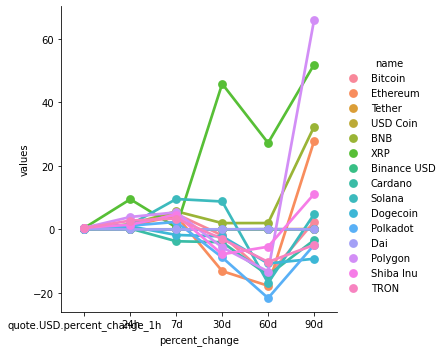

In [26]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')